# Homework 1: Computational Exercises

In [1]:
import numpy as np
from scipy.optimize import fsolve
from matplotlib import cm

## Exercise 5:

In [2]:
def steady_state(x, *args):
    """Returns the steady state solutions for the DSGE model with the 
    functional forms as defined in Exercise 5
    
    Parameters:
    x: Vector valued, contains the steady state vars in this order: 
        c, w, r, k, T
    args: other parameters of the model in the following order:
        gamma, beta, alpha, delta, tau
        
    Returns: a vector of the characterteristic equations evaluated at x
    """
    ret = np.zeros(5)
    gamma, beta, alpha, delta, tau = args
    c = x[0] 
    w = x[1] 
    r = x[2]
    k = x[3]
    T = x[4]
    ret[0] = c - (1-tau)*(w + (r- delta)*k) - T 
    ret[1] = 1./c**gamma - beta*(1./c**gamma)*((r-delta)*(1-tau) + 1)
    ret[2] = r - alpha *(1/k**(1-alpha))
    ret[3] = w - (1-alpha)*(k**alpha)
    ret[4] = tau*(w + (r-delta)*k) - T
    
    return ret
    

In [3]:
##Solve the steady state equations using fsolve
gamma, beta, alpha, delta, tau = 2.5, .98, .4, .1, .05
args = (gamma, beta, alpha, delta, tau)
c, w, r, k, T = fsolve(steady_state, np.ones(5)*.3, args)
print("Steady State Consumption: {}".format(c))
print("Steady State Wage: {}".format(w))
print("Steady State Rental Rate: {}".format(r))
print("Steady State Capital: {}".format(k))
print("Steady State Transfer: {}".format(T))
print("Steady State Investment: {}".format(k*delta))
print("Steady State Output: {}".format(k**alpha))

print("\n\nThese correspond exactly with the algebraic solution.")

Steady State Consumption: 1.4845048188485739
Steady State Wage: 1.3279527683533363
Steady State Rental Rate: 0.12148227712108596
Steady State Capital: 7.287497950720256
Steady State Transfer: 0.0742252409424287
Steady State Investment: 0.7287497950720256
Steady State Output: 2.2132546139221554


These correspond exactly with the algebraic solution.


## Exercise 6:

In [4]:
def steady_state_ex6(x, *args):
    """Returns the steady state solutions for the DSGE model with the 
    functional forms as defined in Exercise 5
    
    Parameters:
    x: Vector valued, contains the steady state vars in this order: 
        c, w, r, l, k, T
    args: other parameters of the model in the following order:
        gamma, xi, beta, alpha, a, delta, tau
        
    Returns: a vector of the characterteristic equations evaluated at x
    """
    ret = np.zeros(6)
    gamma, xi, beta, alpha, a, delta, tau = args
    
    c = x[0] 
    w = x[1]
    r = x[2]
    l = x[3]
    k = x[4]
    T = x[5]
    
    ret[0] = c - (1-tau)*(w*l + (r- delta)*k) - T 
    ret[1] = 1./c**gamma - beta*(1./c**gamma)*((r-delta)*(1-tau) + 1)
    ret[2] = a*(1./(1-l)**xi) - (1./c**gamma)*w*(1-tau)
    ret[3] = r - alpha *(1/k**(1-alpha)) * (l ** (1-alpha))
    ret[4] = w - (1-alpha)*(k**alpha)*(1./l**alpha)
    ret[5] = tau*(w*l + (r-delta)*k) - T
    
    return ret

In [5]:
gamma, xi, beta, alpha, a, delta, tau = 2.5, 1.5, .98, .4, .5, .1, .05
args = (gamma, xi, beta, alpha, a, delta, tau)
c, w, r, l, k, T = fsolve(steady_state_ex6, np.ones(6)*.3, args)
print("Steady State Consumption: {}".format(c))
print("Steady State Wage: {}".format(w))
print("Steady State Rental Rate: {}".format(r))
print("Steady State Labor: {}".format(l))
print("Steady State Capital: {}".format(k))
print("Steady State Transfer: {}".format(T))
print("Steady State Investment: {}".format(k*delta))
print("Steady State Output: {}".format(k**alpha * (l**(1-alpha))))

Steady State Consumption: 0.8607032061456992
Steady State Wage: 1.327952768285868
Steady State Rental Rate: 0.12148227712499896
Steady State Labor: 0.5797914531364153
Steady State Capital: 4.225229026169238
Steady State Transfer: 0.043035160307284964
Steady State Investment: 0.4225229026169238
Steady State Output: 1.2832261087172976


## Exercise 7:

In [6]:
gamma, xi, beta, alpha, a, delta, tau = 2.5, 1.5, .98, .4, .5, .1, .05
import numdifftools

In [7]:
###DO FSOLVE WITHIN THE FUNCTION!!!!!!!
def objective(x):
    """A function that, given gamma, xi, beta, alpha, a, delta, tau and the 
    derivatives wrt these variables
    
    Parameters:
    x: gamma, xi, beta, alpha, a, delta, tau

        
    Returns: None
    """
    gamma, xi, beta, alpha, a, delta, tau = x
    
    args = gamma, xi, beta, alpha, a, delta, tau
    params = [gamma, xi, beta, alpha, a, delta, tau]
    param_names = ["gamma", "xi", "beta", "alpha", "a", "delta", "tau"]
    c, w, r, l, k, T = fsolve(steady_state_ex6, np.ones(6)*.27, args)
    invest= k*delta
    output = k**alpha * (l**(1-alpha))
    for j in range(len(args)):
        new_arg = params[j] + .00001
        params_temp = params.copy()
        params_temp[j] = new_arg
        c1, w1, r1, l1, k1, T1 = fsolve(steady_state_ex6, np.ones(6)*.27, tuple(params_temp))
        invest1 = k1*params_temp[5]
        output1 = k1**params_temp[3] * (l1**(1-params_temp[3]))
        print("Derivative of c wrt {} is {}".format(param_names[j], -((c-c1))/.00001))
        print("Derivative of w wrt {} is {}".format(param_names[j], -((w-w1))/.00001))
        print("Derivative of r wrt {} is {}".format(param_names[j], -((r-r1))/.00001))
        print("Derivative of l wrt {} is {}".format(param_names[j], -((l-l1))/.00001))
        print("Derivative of k wrt {} is {}".format(param_names[j], -((k-k1))/.00001))
        print("Derivative of T wrt {} is {}".format(param_names[j], -((T-T1))/.00001))
        print("Derivative of Investment wrt {} is {}".format(param_names[j], -((invest-invest1))/.00001))
        print("Derivative of Output wrt {} is {}".format(param_names[j], -((output-output1))/.00001))


In [8]:
objective([2.5, 1.5, .98, .4, .5, .1, .05])

Derivative of c wrt gamma is 0.028253754680296336
Derivative of w wrt gamma is -1.2589929099249274e-08
Derivative of r wrt gamma is -1.1934897514720433e-10
Derivative of l wrt gamma is 0.019032449583011868
Derivative of k wrt gamma is 0.13869879618155778
Derivative of T wrt gamma is 0.0014126877341535946
Derivative of Investment wrt gamma is 0.013869879617045553
Derivative of Output wrt gamma is 0.0421236397318836
Derivative of c wrt xi is -0.16330135650388655
Derivative of w wrt xi is 7.815970093361102e-09
Derivative of r wrt xi is 8.604228440844962e-11
Derivative of l wrt xi is -0.11000392837745564
Derivative of k wrt xi is -0.8016533151966597
Derivative of T wrt xi is -0.008165067825333105
Derivative of Investment wrt xi is -0.08016533152299665
Derivative of Output wrt xi is -0.24346669138530783
Derivative of c wrt beta is 1.7510239305296158
Derivative of w wrt beta is 7.987868562708832
Derivative of r wrt beta is -1.0960233635684546
Derivative of l wrt beta is 0.2602536597451355
De

# Homework 2:

## Exercise 1

In [9]:
def policy_function(x, y, P, Q, k_bar):
    """Policy function, linearlized, Brock-Mirman"""
    

    return k_bar + P * (x - k_bar) + Q*y


In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [11]:
def F(alpha, k_bar):
    return (alpha * k_bar**(alpha-1)) / (k_bar**alpha - k_bar)
def G(alpha, k_bar):
    return -(alpha* (k_bar)**(alpha-1) * (alpha + k_bar**(alpha-1)))/(k_bar**alpha - k_bar)
def H(alpha, k_bar):
    return (alpha**2 * (k_bar)**(2*(alpha-1))) / (k_bar**alpha - k_bar)
def L(alpha, k_bar):
    return -(alpha*k_bar**(2*alpha -1))/(k_bar**alpha - k_bar)
def M(alpha, k_bar):
    return (alpha**2 * k_bar**(2*(alpha-1)))/(k_bar**alpha - k_bar)
def P(G, F, H):
    return (-G - np.sqrt(G**2 - 4*F*H))/(2*F)
def Q(L, N, M, F, P, G):
    return -(L*N + M)/(F*N + F*P + G)
def k_bar(alpha, beta):
    return np.power((alpha*beta), 1./(1-alpha))


0.20996332662109743
3.1333792783220216
-9.24666619684417
3.1973257942061446
-1.6783029001074112
3.1973257942061446
0.4


<Figure size 432x288 with 0 Axes>

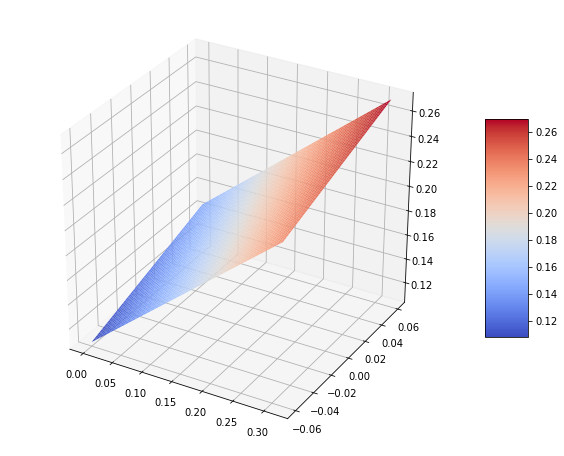

In [12]:
alpha = .4
beta = .98
rho = .95
sigma = .02
k_bar = k_bar(alpha, beta)
print(k_bar)
F = F(alpha, k_bar)
print(F)
G = G(alpha, k_bar)
print(G)
H = H(alpha, k_bar)
print(H)
L = L(alpha, k_bar)
print(L)
M = M(alpha, k_bar)
print(M)
P = P(G, F, H)
print(P)
Q = Q(L, rho, M, F, P, G)
x = np.linspace(0.*k_bar, 1.5*k_bar, 500)
y = np.linspace(-3*sigma, 3*sigma, 50)
x, y = np.meshgrid(x,y)
fig = plt.figure()
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
surface =ax.plot_surface(x, y, policy_function(x,y, P, Q, k_bar), cmap=cm.coolwarm)
fig.colorbar(surface,shrink=.5, aspect=5)
plt.show()
plt.close()

In [13]:
policy_function(1, 0, P, Q, k_bar)

0.5259779959726585

## Exercise 2:

In [14]:
def F_log(alpha, k_bar):
    return (1/(k_bar**alpha - k_bar))
def G_log(alpha, k_bar):
    return (alpha-1)/k_bar - (1/(k_bar**alpha -k_bar)) - (alpha * k_bar**(alpha-1)/(k_bar**alpha - k_bar))
def H_log(alpha, k_bar):
    return alpha*k_bar**(alpha-1)/(k_bar**alpha - k_bar)
def L_log(alpha, k_bar):
    return 1 - k_bar**alpha/(k_bar**alpha - k_bar)
def M_log(alpha, k_bar):
    return k_bar**alpha/(k_bar**alpha - k_bar)
def P_log(G, F, H):
    return (-G - np.sqrt(G**2 - 4*F*H))/(2*F)
def Q_log(L, N, M, F, P, G):
    return -(L*N + M)/(F*N + F*P + G)
def k_bar_log(alpha, beta):
    return np.power((alpha*beta), 1./(1-alpha))


0.1927826194504225
2.708076157015596
-8.843092418849324
2.763343017362853
-0.5220700152207003
1.5220700152207003
0.3499999999999999


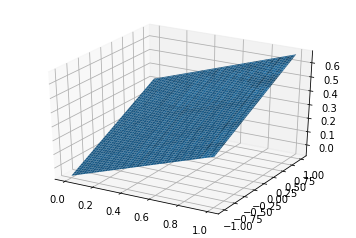

In [15]:
alpha = .35
beta = .98
rho = .95
k_bar_log = k_bar_log(alpha, beta)
print(k_bar_log)
F = F_log(alpha, k_bar_log)
print(F)
G = G_log(alpha, k_bar_log)
print(G)
H = H_log(alpha, k_bar_log)
print(H)
L = L_log(alpha, k_bar_log)
print(L)
M = M_log(alpha, k_bar_log)
print(M)
P = P_log(G, F, H)
print(P)
Q = Q_log(L, rho, M, F, P, G)
x = np.linspace(0, 1, 100)
y = np.linspace(-1, 1, 100)
x, y = np.meshgrid(x,y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, policy_function(x,y, P, Q, k_bar_log))
plt.show()
plt.close()

## Exercise 4:

Note this is the same problem as exercise 6 in Homework 1.

## Exercise 5:

Note this is the same problem as exercise 7 in Homework 1.

## Exercise 6:

In [16]:
def Modeldefs(Xp, X, Y, Z, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns explicitly defined
    values for consumption, gdp, wages, real interest rates, and transfers
    
    Inputs are:
        Xp: value of capital in next period
        X: value of capital this period
        Y: value of labor this period
        Z: value of productivity this period
        params: list of parameter values
    
    Outputs are:
        GDP: GDP
        w: wage rate
        r: rental rate on capital
        T: transfer payments
        c: consumption
        i: investment
        u: utiity
    '''
    
    # unpack input vectors
    kp = Xp
    k = X
    ell = Y
    z = Z
    
    # truncate labor if necessary
    if ell > 0.9999:
        ell = 0.9999
    elif ell < 0.0001:
        ell = 0.0001
    
    # unpack params
    [alpha, beta, gamma, delta, xi, a, rho, sigma, tau] = params
    
    # find definintion values
    GDP = k**alpha*(np.exp(z)*ell)**(1-alpha)
    w = (1-alpha)*GDP/ell
    r = alpha*GDP/k
    T = (w*ell + (r - delta)*k)*tau
    c = (1-tau)*(w*ell + (r - delta)*k) + k + T - kp
    i = GDP - c
    
    u = (c**(1-gamma)-1)/(1-gamma) + a*((1-ell)**(1-xi) - 1)/(1-xi)

    return GDP, w, r, c, i, u, T


def Modeldyn(theta0, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns values from the
    characterizing Euler equations.
    
    Inputs are:
        theta: a vector containng (Xpp, Xp, X, Yp, Y, Zp, Z) where:
            Xpp: value of capital in two periods
            Xp: value of capital in next period
            X: value of capital this period
            Yp: value of labor in next period
            Y: value of labor this period
            Zp: value of productivity in next period
            Z: value of productivity this period
        params: list of parameter values
    
    Output are:
        Euler: a vector of Euler equations written so that they are zero at the
            steady state values of X, Y & Z.  This is a 2x1 numpy array. 
    '''
    
    # unpack theat0
    (Xpp, Xp, X, Yp, Y, Zp, Z) = theta0
    
    # unpack params
    [alpha, beta, gamma, delta, xi, a, rho, sigma, tau] = params
    
    # find definitions for now and next period
    ell = Y
    if ell > 1:
        ell = 0.9999
    elif ell < 0.0001:
        ell = 0.0001
    GDP, w, r, c, i, u, T = Modeldefs(Xp, X, Y, Z, params)
    GDPp, wp, rp, cp, ip, up, Tp = Modeldefs(Xpp, Xp, Yp, Zp, params)
    
    # Evaluate Euler equations
    E1 = (c**(-gamma)*w*(1-tau)) - a*(1-ell)**(-xi)
    E2 = (c**(-gamma)) - (beta * cp**(-gamma))*((rp-delta)*(1-tau) + 1)
    
    return np.array([E1, E2])

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# import the modules from LinApp
from LinApp_FindSS import LinApp_FindSS
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve
from LinApp_SSL import LinApp_SSL

In [18]:
# set parameter values
alpha = .40
beta = .98
gamma = 2.5
delta = .10
xi = 1.5
a = .5
rho = .9
sigma = .01
tau = .05

# make parameter list to pass to functions
params = np.array([alpha, beta, gamma, delta, xi, a, rho, sigma, tau])

# set LinApp parameters
Zbar = np.array([0.])
nx = 1  # number of X variables
ny = 1  # number of Y variables
nz = 1  # number of Z variables
logX = 0  # 1 if log-linearizing, otherwise 0
Sylv = 0  # just set this to 0 for now.

In [19]:
# take a guess for steady state values of k and ell
guessXY = np.array([.5, .5])

# find the steady state values using LinApp_FindSS
XYbar = LinApp_FindSS(Modeldyn, params, guessXY, Zbar, nx, ny)
(kbar, ellbar) = XYbar

# set up steady state input vector
theta0 = np.array([kbar, kbar, kbar, ellbar, ellbar, 0., 0.])

# check SS solution
check = Modeldyn(theta0, params)
print ('check SS: ', check)
if np.max(np.abs(check)) > 1.E-6:
    print ('Have NOT found steady state')
    
# find the steady state values for the definitions
Ybar, wbar, rbar, cbar, ibar, ubar, tbar = \
    Modeldefs(kbar, kbar, ellbar, 0., params)

# display all steady state values
print ('kbar:   ', kbar)
print ('ellbar: ', ellbar)
print ('Ybar:   ', Ybar)
print ('wbar:   ', wbar)
print ('rbar:   ', rbar)
print ('cbar:   ', cbar)
print ('ibar:   ', ibar)
print ('ubar:   ', ubar)
print ('tbar:   ', tbar)

check SS:  [-1.47215573e-13 -2.30926389e-13]
kbar:    4.225229026773769
ellbar:  0.5797914531669756
Ybar:    1.2832261088313197
wbar:    1.3279527683500643
rbar:    0.12148227712154526
cbar:    0.8607032061539437
ibar:    0.422522902677376
ubar:    -0.7108726381180849
tbar:    0.04303516030769715


In [20]:
# find the derivatives matrices
[AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM] = \
   LinApp_Deriv(Modeldyn, params, theta0, nx, ny, nz, logX)

# set value for NN    
NN = rho
    
# find the policy and jump function coefficients
PP, QQ, RR, SS = LinApp_Solve(AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM, NN, Zbar, Sylv)
print("F: ", FF)
print("G: ", GG)
print("H: ", HH)
print("L: ", LL)
print("M: ", MM)
print("N: ", NN)
print('P: ', PP)
print('Q: ', QQ)


F:  [[-4.2262291]]
G:  [[8.56661569]]
H:  [[-4.31701813]]
L:  [[3.15518743]]
M:  [[-3.25392451]]
N:  0.9
P:  [[0.9152937]]
Q:  [[0.54504228]]


## Exercise 7:

In [21]:
sigma = .02 
period = 250
num_sim = 10000

Y_sims =[]
w_sims = []
r_sims = []
c_sims = []
i_sims = []
u_sims = []
t_sims = []
k_sims = []
l_sims = []
z_sims = []
for simulation in range(num_sim):

    # create a history of z's using equation (7)
    zhist = np.zeros(period+1)
    epshist = sigma*np.random.normal(0., 1., period+1)

    zhist[0] = epshist[0]
    for t in range(1,period+1):
        zhist[t] = rho*zhist[t-1] + epshist[t]

    # LinApp_SSL requires that Zhist be a 2-dimensional array
    Zhist = np.reshape(zhist, (period+1, 1))

    # Linapp_SSL also requires that starting values be arrays
    k0 = np.array([[kbar]])
    ell0 = np.array([[ellbar]])

    # create a history of k's and ell's using LinApp_SSL
    khist, ellhist =  LinApp_SSL(k0, Zhist ,XYbar, logX, PP, QQ, RR, SS)

    # create histories of remaining variables
    Yhist = np.zeros(period)
    whist = np.zeros(period)
    rhist = np.zeros(period)
    chist = np.zeros(period)
    ihist = np.zeros(period)
    uhist = np.zeros(period)
    thist = np.zeros(period)
    for t in range(0,period):
        Yhist[t], whist[t], rhist[t], chist[t], ihist[t], uhist[t], thist[t] = \
            Modeldefs(khist[t+1], khist[t], ellhist[t], zhist[t], params)

    # delete last observation
    khist = khist[0:period]
    zhist = zhist[0:period]
    ellhist = ellhist[0:period]
    
    Y_sims.append(Yhist)
    w_sims.append(whist)
    r_sims.append(rhist)
    c_sims.append(chist)
    i_sims.append(ihist)
    u_sims.append(uhist)
    t_sims.append(thist)
    k_sims.append(khist)
    l_sims.append(ellhist)
    z_sims.append(zhist)
    
print(len(Y_sims), len(w_sims))
# plot time series
time = range(0, period)



10000 10000


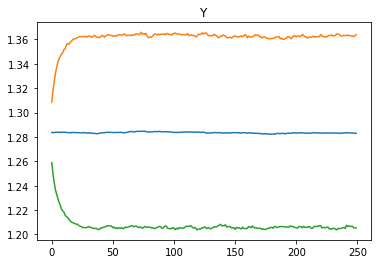

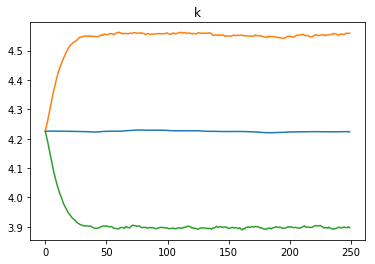

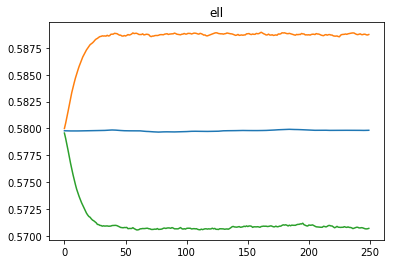

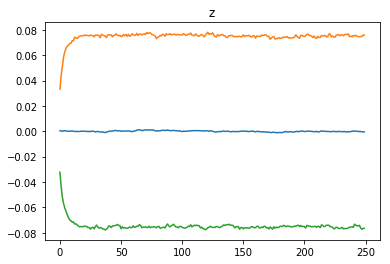

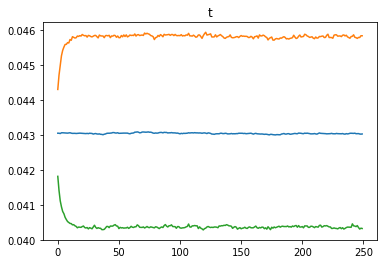

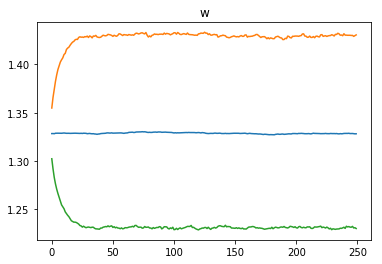

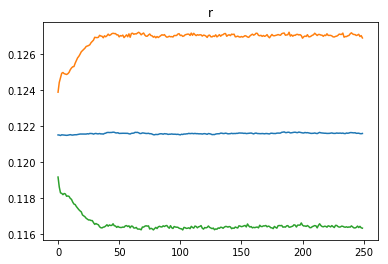

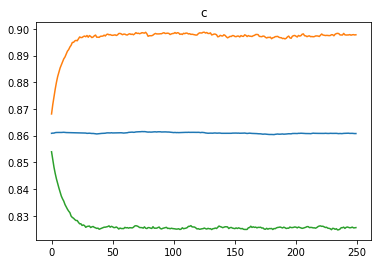

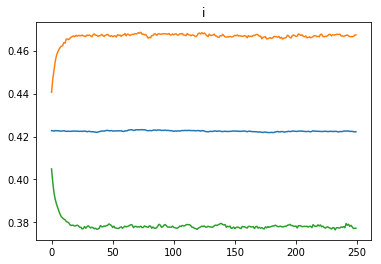

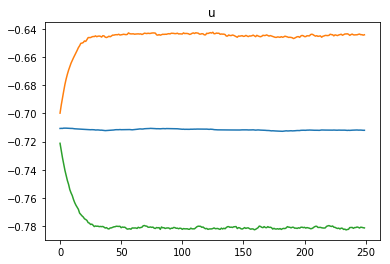

In [22]:
from scipy.stats import sem
k_sims = np.squeeze(k_sims)
l_sims = np.squeeze(l_sims)
Y_avg = sum(Y_sims)/num_sim
w_avg = sum(w_sims)/num_sim
r_avg = sum(r_sims)/num_sim
c_avg = sum(c_sims)/num_sim
i_avg = sum(i_sims)/num_sim
u_avg = sum(u_sims)/num_sim
t_avg = sum(t_sims)/num_sim
k_avg = sum(k_sims)/num_sim
l_avg = sum(l_sims)/num_sim
z_avg = sum(z_sims)/num_sim


Y_q95 = np.percentile(Y_sims, 95, axis=0)
Y_q5 = np.percentile(Y_sims, 5, axis = 0)

k_q95 = np.percentile(k_sims, 95, axis=0)
k_q5 = np.percentile(k_sims, 5, axis = 0)

l_q95 = np.percentile(l_sims, 95, axis=0)
l_q5 = np.percentile(l_sims, 5, axis = 0)

w_q95 = np.percentile(w_sims, 95, axis=0)
w_q5 = np.percentile(w_sims, 5, axis = 0)

r_q95 = np.percentile(r_sims, 95, axis=0)
r_q5 = np.percentile(r_sims, 5, axis = 0)

c_q95 = np.percentile(c_sims, 95, axis=0)
c_q5 = np.percentile(c_sims, 5, axis = 0)
i_q95 = np.percentile(i_sims, 95, axis=0)
i_q5 = np.percentile(i_sims, 5, axis = 0)

u_q95 = np.percentile(u_sims, 95, axis=0)
u_q5 = np.percentile(u_sims, 5, axis = 0)

t_q95 = np.percentile(t_sims, 95, axis=0)
t_q5 = np.percentile(t_sims, 5, axis = 0)
z_q95 = np.percentile(z_sims, 95, axis=0)
z_q5 = np.percentile(z_sims, 5, axis = 0)

fig = plt.figure()
plt.plot(time, Y_avg, label='Y')
plt.plot(time ,Y_q95)
plt.plot(time, Y_q5)
plt.title('Y')
plt.show()
plt.close()
plt.plot(time, k_avg, label='k')
plt.plot(time ,k_q95)
plt.plot(time, k_q5)
plt.title('k')
plt.show()
plt.close()
plt.plot(time, l_avg, label='ell')
plt.plot(time ,l_q95)
plt.plot(time, l_q5)
plt.title('ell')
plt.show()
plt.close()
plt.plot(time, z_avg, label='z')
plt.plot(time ,z_q95)
plt.plot(time, z_q5)
plt.title('z')
plt.show()
plt.close()
plt.plot(time, t_avg, label='t')
plt.plot(time ,t_q95)
plt.plot(time, t_q5)
plt.title('t')
plt.show()
plt.close()
plt.plot(time, w_avg, label='w')
plt.plot(time ,w_q95)
plt.plot(time, w_q5)
plt.title('w')
plt.show()
plt.close()
plt.plot(time, r_avg, label='r')
plt.plot(time ,r_q95)
plt.plot(time, r_q5)
plt.title('r')
plt.show()
plt.close()

plt.plot(time, c_avg, label='c')
plt.plot(time ,c_q95)
plt.plot(time, c_q5)
plt.title('c')
plt.show()
plt.close()
plt.plot(time, i_avg, label='i')
plt.plot(time ,i_q95)
plt.plot(time, i_q5)
plt.title('i')
plt.show()
plt.close()
plt.plot(time, u_avg, label='u')
plt.plot(time ,u_q95)
plt.plot(time, u_q5)
plt.title('u')
plt.show()
plt.close()

In [23]:
q95 = np.percentile(Y_sims, 95, axis=0)

## Exercise 8:

In [24]:
print("Average Value of Means")
print("Y: {}".format(np.mean(Y_avg)))
print("k: {}".format(np.mean(k_avg)))
print("l: {}".format(np.mean(l_avg)))
print("z: {}".format(np.mean(z_avg)))
print("w: {}".format(np.mean(w_avg)))
print("c: {}".format(np.mean(c_avg)))
print("i: {}".format(np.mean(i_avg)))
print("u: {}".format(np.mean(u_avg)))

print("Standard Errors of Means")
print("Y: {}".format(sem(Y_avg)))
print("k: {}".format(sem(k_avg)))
print("l: {}".format(sem(l_avg)))
print("z: {}".format(sem(z_avg)))
print("w: {}".format(sem(w_avg)))
print("c: {}".format(sem(c_avg)))
print("i: {}".format(sem(i_avg)))
print("u: {}".format(sem(u_avg)))

Average Value of Means
Y: 1.2834758837562377
k: 4.225053067169145
l: 0.5797963460549117
z: -3.945588836123827e-05
w: 1.3286885816786607
c: 0.8609771772795217
i: 0.42249870647671595
u: -0.711549053735045
Standard Errors of Means
Y: 3.233435368846012e-05
k: 0.00014025766430358173
l: 3.835415925221685e-06
z: 2.923459530801831e-05
w: 4.161719006090877e-05
c: 1.5558539570780124e-05
i: 1.7554325099628172e-05
u: 3.215852913543814e-05


In [25]:
print("Average Value of Volatility")
Y_stds = np.std(Y_sims, axis=1)
k_stds = np.std(k_sims, axis=1)
l_stds = np.std(l_sims, axis=1)
z_stds = np.std(z_sims, axis=1)
w_stds = np.std(w_sims, axis=1)
c_stds = np.std(c_sims, axis=1)
i_stds = np.std(i_sims, axis=1)
u_stds = np.std(u_sims, axis=1)
print("Y: {}".format(np.mean(Y_stds)))
print("k: {}".format(np.mean(k_stds)))
print("l: {}".format(np.mean(l_stds)))
print("z: {}".format(np.mean(z_stds)))
print("w: {}".format(np.mean(w_stds)))
print("c: {}".format(np.mean(c_stds)))
print("i: {}".format(np.mean(i_stds)))
print("u: {}".format(np.mean(u_stds)))

print("Standard Errors of Volatility")
print("Y: {}".format(sem(Y_stds)))
print("k: {}".format(sem(k_stds)))
print("l: {}".format(sem(l_stds)))
print("z: {}".format(sem(z_stds)))
print("w: {}".format(sem(w_stds)))
print("c: {}".format(sem(c_stds)))
print("i: {}".format(sem(i_stds)))
print("u: {}".format(sem(u_stds)))

Average Value of Volatility
Y: 0.0437743273645342
k: 0.17353060563318845
l: 0.0047443191561299496
z: 0.043460359513394005
w: 0.054606063433675196
c: 0.01951262762714961
i: 0.025368239221596135
u: 0.036682653747251
Standard Errors of Volatility
Y: 7.571965503832027e-05
k: 0.0003923287803813242
l: 1.0745252599265252e-05
z: 5.78566933816927e-05
w: 0.00010344211715415991
c: 4.036267537304787e-05
i: 3.661265652078339e-05
u: 7.917405078578692e-05


In [26]:
print("Average Value of Coefficient of Variation")
Y_cov = np.std(Y_sims, axis=1)/np.mean(Y_sims, axis=1)
k_cov = np.std(k_sims, axis=1)/np.mean(k_sims, axis=1)
l_cov = np.std(l_sims, axis=1)/np.mean(l_sims, axis=1)
z_cov = np.std(z_sims, axis=1)/np.mean(z_sims, axis=1)
w_cov = np.std(w_sims, axis=1)/np.mean(w_sims, axis=1)
c_cov = np.std(c_sims, axis=1)/np.mean(c_sims, axis=1)
i_cov = np.std(i_sims, axis=1)/np.mean(i_sims, axis=1)
u_cov = np.std(u_sims, axis=1)/np.mean(u_sims, axis=1)

print("Y: {}".format(np.mean(Y_cov)))
print("k: {}".format(np.mean(k_cov)))
print("l: {}".format(np.mean(l_cov)))
print("z: {}".format(np.mean(z_cov)))
print("w: {}".format(np.mean(w_cov)))
print("c: {}".format(np.mean(c_cov)))
print("i: {}".format(np.mean(i_cov)))
print("u: {}".format(np.mean(u_cov)))

print("Standard Errors of Coefficient of Variation")
print("Y: {}".format(sem(Y_cov)))
print("k: {}".format(sem(k_cov)))
print("l: {}".format(sem(l_cov)))
print("z: {}".format(sem(z_cov)))
print("w: {}".format(sem(w_cov)))
print("c: {}".format(sem(c_cov)))
print("i: {}".format(sem(i_cov)))
print("u: {}".format(sem(u_cov)))

Average Value of Coefficient of Variation
Y: 0.03410862565227692
k: 0.04108441357377655
l: 0.008182870217112871
z: 0.419436926518417
w: 0.041099560077916035
c: 0.022663301570255142
i: 0.060063190548041163
u: -0.05155643040793021
Standard Errors of Coefficient of Variation
Y: 5.9007306903969373e-05
k: 9.3161367322415e-05
l: 1.8537249216096513e-05
z: 4.792042382910093
w: 7.76750453606313e-05
c: 4.683382276069214e-05
i: 8.738090323722787e-05
u: 0.00011079051296167922


In [27]:
print("Average Value of Relative Volatility")
Y_relv = np.std(Y_sims, axis=1)/np.std(Y_sims, axis=1)
k_relv = np.std(k_sims, axis=1)/np.std(Y_sims, axis=1)
l_relv = np.std(l_sims, axis=1)/np.std(Y_sims, axis=1)
z_relv = np.std(z_sims, axis=1)/np.std(Y_sims, axis=1)
w_relv = np.std(w_sims, axis=1)/np.std(Y_sims, axis=1)
c_relv = np.std(c_sims, axis=1)/np.std(Y_sims, axis=1)
i_relv = np.std(i_sims, axis=1)/np.std(Y_sims, axis=1)
u_relv = np.std(u_sims, axis=1)/np.std(Y_sims, axis=1)

print("Y: {}".format(np.mean(Y_relv)))
print("k: {}".format(np.mean(k_relv)))
print("l: {}".format(np.mean(l_relv)))
print("z: {}".format(np.mean(z_relv)))
print("w: {}".format(np.mean(w_relv)))
print("c: {}".format(np.mean(c_relv)))
print("i: {}".format(np.mean(i_relv)))
print("u: {}".format(np.mean(u_relv)))

print("Standard Errors of Relative Volatility")
print("Y: {}".format(sem(Y_relv)))
print("k: {}".format(sem(k_relv)))
print("l: {}".format(sem(l_relv)))
print("z: {}".format(sem(z_relv)))
print("w: {}".format(sem(w_relv)))
print("c: {}".format(sem(c_relv)))
print("i: {}".format(sem(i_relv)))
print("u: {}".format(sem(u_relv)))

Average Value of Relative Volatility
Y: 1.0
k: 3.930437249295075
l: 0.10744848350030878
z: 1.0001756547025364
w: 1.2440084418579984
c: 0.44325592660120294
i: 0.582521587717357
u: 0.8323156685486801
Standard Errors of Relative Volatility
Y: 0.0
k: 0.0026040521959853034
l: 7.136426265952814e-05
z: 0.0005272012186355248
w: 0.0002581795125726375
c: 0.00018285045005481178
i: 0.00021653936013168423
u: 0.0004659733761049948


In [65]:
##TODO Autocorrelation 
k_corrs = []
l_corrs = []
z_corrs = []
w_corrs = []
c_corrs = []
i_corrs = []
u_corrs = []

k_auto = []
l_auto = []
z_auto = []
w_auto = []
c_auto = []
i_auto = []
u_auto = []

k_sims_shift = [np.array(k_sims[i][1:]) for i in range(len(k_sims))]
l_sims_shift = [np.array(l_sims[i][1:]) for i in range(len(l_sims))]
z_sims_shift = [np.array(z_sims[i][1:]) for i in range(len(z_sims))]
w_sims_shift = [np.array(w_sims[i][1:]) for i in range(len(w_sims))]
c_sims_shift = [np.array(c_sims[i][1:]) for i in range(len(c_sims))]
i_sims_shift = [np.array(i_sims[i][1:]) for i in range(len(i_sims))]
u_sims_shift = [np.array(u_sims[i][1:]) for i in range(len(u_sims))]

for i in range(len(Y_sims)):
    k_corrs.append(np.corrcoef(k_sims[i], Y_sims[i]))
    l_corrs.append(np.corrcoef(l_sims[i], Y_sims[i]))
    z_corrs.append(np.corrcoef(z_sims[i], Y_sims[i]))
    w_corrs.append(np.corrcoef(w_sims[i], Y_sims[i]))
    c_corrs.append(np.corrcoef(c_sims[i], Y_sims[i]))
    i_corrs.append(np.corrcoef(i_sims[i], Y_sims[i]))
    u_corrs.append(np.corrcoef(u_sims[i], Y_sims[i]))
    
    k_auto.append(np.corrcoef(k_sims[i][0:249], k_sims_shift[i]))
    l_auto.append(np.corrcoef(l_sims[i][0:249], l_sims_shift[i]))
    z_auto.append(np.corrcoef(z_sims[i][0:249], z_sims_shift[i]))
    w_auto.append(np.corrcoef(w_sims[i][0:249], w_sims_shift[i]))
    c_auto.append(np.corrcoef(c_sims[i][0:249], c_sims_shift[i]))
    i_auto.append(np.corrcoef(i_sims[i][0:249], i_sims_shift[i]))
    u_auto.append(np.corrcoef(u_sims[i][0:249], u_sims_shift[i]))

print("Average Value of Correlation with Output")
print("k: {}".format(np.mean([k_corrs[i][0,1] for i in range(len(k_corrs))])))
print("l: {}".format(np.mean([l_corrs[i][0,1] for i in range(len(l_corrs))])))
print("z: {}".format(np.mean([z_corrs[i][0,1] for i in range(len(z_corrs))])))
print("w: {}".format(np.mean([w_corrs[i][0,1] for i in range(len(w_corrs))])))
print("c: {}".format(np.mean([c_corrs[i][0,1] for i in range(len(c_corrs))])))
print("i: {}".format(np.mean([i_corrs[i][0,1] for i in range(len(i_corrs))])))
print("u: {}".format(np.mean([u_corrs[i][0,1] for i in range(len(u_corrs))])))

print("Standard Errors of Correlation with Output")
print("k: {}".format(sem(k_corrs)))
print("l: {}".format(sem(l_corrs)))
print("z: {}".format(sem(z_corrs)))
print("w: {}".format(sem(w_corrs)))
print("c: {}".format(sem(c_corrs)))
print("i: {}".format(sem(i_corrs)))
print("u: {}".format(sem(u_corrs)))

print("Average Value of Autocorrelation")
print("k: {}".format(np.mean([k_auto[i][0,1] for i in range(len(k_auto))])))
print("l: {}".format(np.mean([l_auto[i][0,1] for i in range(len(l_auto))])))
print("z: {}".format(np.mean([z_auto[i][0,1] for i in range(len(z_auto))])))
print("w: {}".format(np.mean([w_auto[i][0,1] for i in range(len(w_auto))])))
print("c: {}".format(np.mean([c_auto[i][0,1] for i in range(len(c_auto))])))
print("i: {}".format(np.mean([i_auto[i][0,1] for i in range(len(i_auto))])))
print("u: {}".format(np.mean([u_auto[i][0,1] for i in range(len(u_auto))])))

print("Standard Errors of Autocorrelation")
print("k: {}".format(sem(k_auto)))
print("l: {}".format(sem(l_auto)))
print("z: {}".format(sem(z_auto)))
print("w: {}".format(sem(w_auto)))
print("c: {}".format(sem(c_auto)))
print("i: {}".format(sem(i_auto)))
print("u: {}".format(sem(u_auto)))


Average Value of Correlation with Output
k: 0.7814279126607709
l: -0.8119600222483178
z: 0.9617956235611884
w: 0.9934704727941193
c: 0.9664437814567748
i: 0.9811098928851849
u: 0.9410505899007697
Standard Errors of Correlation with Output
k: [[8.27511384e-19 6.34418624e-04]
 [6.34418624e-04 8.27138883e-19]]
l: [[8.62236910e-19 5.36162659e-04]
 [5.36162659e-04 8.27138883e-19]]
z: [[8.21155883e-19 3.39844608e-05]
 [3.39844608e-05 8.27138883e-19]]
w: [[7.60844648e-19 1.12447617e-05]
 [1.12447617e-05 8.27138883e-19]]
c: [[8.61378678e-19 7.59018551e-05]
 [7.59018551e-05 8.27138883e-19]]
i: [[6.82618172e-19 2.06680617e-05]
 [2.06680617e-05 8.27138883e-19]]
u: [[8.89471018e-19 1.35954381e-04]
 [1.35954381e-04 8.27138883e-19]]
Average Value of Autocorrelation
k: 0.9933048376927396
l: 0.9939246290067418
z: 0.883179681100235
w: 0.951059777518731
c: 0.9707758904827717
i: 0.8980423268938026
u: 0.9803429774444061
Standard Errors of Autocorrelation
k: [[8.29891433e-19 2.69191787e-05]
 [2.69191787e-0

In [64]:
len(k_sims_shift[1])


249

## Exercise 9

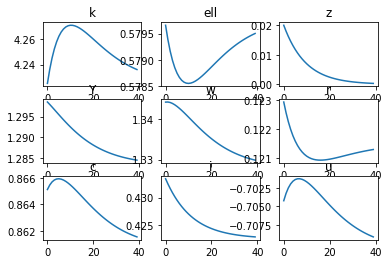

In [29]:

# set number of observations
nobs = 40 

# create a history of z's using equation (7)
zhist = np.zeros(nobs+1)
#epshist = sigma*np.random.normal(0., 1., nobs+1)
epshist = np.zeros(nobs+1)
epshist[0] = sigma
zhist[0] = epshist[0]
for t in range(1,nobs+1):
    zhist[t] = rho*zhist[t-1] + epshist[t]
    
# LinApp_SSL requires that Zhist be a 2-dimensional array
Zhist = np.reshape(zhist, (nobs+1, 1))

# Linapp_SSL also requires that starting values be arrays
k0 = np.array([[kbar]])
ell0 = np.array([[ellbar]])

# create a history of k's and ell's using LinApp_SSL
khist, ellhist =  LinApp_SSL(k0, Zhist ,XYbar, logX, PP, QQ, RR, SS)

# create histories of remaining variables
Yhist = np.zeros(nobs)
whist = np.zeros(nobs)
rhist = np.zeros(nobs)
chist = np.zeros(nobs)
ihist = np.zeros(nobs)
uhist = np.zeros(nobs)
thist = np.zeros(nobs)
for t in range(0,nobs):
    Yhist[t], whist[t], rhist[t], chist[t], ihist[t], uhist[t] , thist[t]= \
        Modeldefs(khist[t+1], khist[t], ellhist[t], zhist[t], params)
        
# delete last observation
khist = khist[0:nobs]
zhist = zhist[0:nobs]
ellhist = ellhist[0:nobs]

# plot time series
time = range(0, nobs)

fig = plt.figure()
plt.subplot(3,3,1)
plt.plot(time, khist, label='k')
plt.title('k')
plt.subplot(3,3,2)
plt.plot(time, ellhist, label='ell')
plt.title('ell')
plt.subplot(3,3,3)
plt.plot(time, zhist, label='z')
plt.title('z')
plt.subplot(3,3,4)
plt.plot(time, Yhist, label='Y')
plt.title('Y')
plt.subplot(3,3,5)
plt.plot(time, whist, label='w')
plt.title('w')
plt.subplot(3,3,6)
plt.plot(time, rhist, label='r')
plt.title('r')
plt.subplot(3,3,7)
plt.plot(time, chist, label='c')
plt.title('c')
plt.subplot(3,3,8)
plt.plot(time, ihist, label='i')
plt.title('i')
plt.subplot(3,3,9)
plt.plot(time, uhist, label='u')
plt.title('u')
plt.show()
plt.close()

# Homework 3: Perturbation Method

## Exercise 2:

In [30]:
def excess(w, k):
    
    alpha = .33
    z = 1
    b = 2
    t = .1
    h = 24
    nd = (((1 - alpha)* z) / w) ** (1 / alpha) * k
    pi = z * k ** alpha * (nd) ** (1 - alpha) - w * nd
    ns = h - (b / (w * (1 + b))) * (w * h + pi - t)
    return nd - ns
f = lambda w: excess(w, k)

In [31]:
k = 5
k0= 5
w0 = fsolve(f, .7) 
print(w0)

[0.62736178]


In [32]:
##compute numerical differentiation (third order) for a 2D function
def third_order(func, x0, y0, eps):
    ##Define values from our bivariate grid
    K_x = x0
    K_y = y0
    
    L_x = K_x + eps
    L_y = K_y
    
    M_x = K_x + 2*eps
    M_y = K_y
    
    J_x = K_x - eps
    J_y = K_y
    
    I_x = K_x - 2*eps
    I_y = K_y
    
    F_x = K_x
    F_y = K_y + eps
    
    B_x = K_x
    B_y = K_y + 2*eps
    
    Q_x = K_x
    Q_y = K_y - eps
    
    U_x = K_x
    U_y = K_y - 2*eps
    
    D_x = K_x - 2*eps
    D_y = K_y + eps
    
    E_x = K_x - eps
    E_y = K_y + eps
    
    G_x = K_x + eps
    G_y = K_y + eps
    
    H_x = K_x + 2*eps
    H_y = K_y + eps
    
    A_x = K_x - eps
    A_y = K_y + 2*eps
    
    C_x = K_x + eps
    C_y = K_y + 2*eps
    
    N_x = K_x - 2*eps
    N_y = K_y - eps
    
    P_x = K_x - eps
    P_y = K_y - eps
    
    R_x = K_x + eps
    R_y = K_y - eps
    
    S_x = K_x + 2*eps
    S_y = K_y - eps
    
    T_x = K_x - eps
    T_y = K_y - 2*eps
    
    V_x = K_x + eps
    V_y = K_y - 2*eps
    
    fx = (func(L_x, L_y) - func(J_x, J_y))/(2*eps)
    fy = (func(F_x, F_y) - func(Q_x, Q_y))/(2*eps)
    fxx = (func(L_x, L_y) + func(J_x, J_y) - 2*func(K_x, K_y))/(eps**2)
    fyy = (func(F_x, F_y) + func(Q_x, Q_y) - 2*func(K_x, K_y))/(eps**2)
    fxy = (func(G_x, G_y) - func(E_x, E_y) - func(R_x, R_y)+ func(P_x, P_y))/(4*eps**2)
    fxxx = (func(M_x, M_y) - 2*func(L_x, L_y) + 2*func(J_x, J_y)- func(I_x, I_y))/(2*eps**3)
    fxxy = (func(H_x, H_y)- 2*func(F_x, F_y) - func(S_x,S_y) + func(D_x, D_y)+ 2*func(Q_x, Q_y)-func(N_x, N_y))/(8*eps)
    fxyy = (func(A_x, A_y)- 2*func(J_x, J_y) - func(C_x, C_y) + func(T_x,T_y)+ 2*func(L_x, L_y)-func(V_x, V_y))/(8*eps)
    fyyy = (func(B_x, B_y)-2*func(F_x, F_y) + 2*func(Q_x, Q_y)-func(U_x, U_y))/(2*eps**3)
    
    return fx, fy, fxx, fyy, fxy, fxxx, fxxy, fxyy, fyyy
    
    
    
    
    
    

In [33]:
##get derivatives from numerical differentiator
fx, fy, fxx, fyy, fxy, fxxx, fxxy, fxyy, fyyy = third_order(excess, w0, 5, .001)
print(fx, fy, fxx, fyy, fxy, fxxx, fxxy, fxyy, fyyy)

##Calculate our cubic approximation using the formulas
w1 = - fy/fx
w2 = -(fxx*w1**2 + 2*fxy*w1 + fyy)/fx
w3 = -(fxxx*w1**3 + 3*(fxx*w1*w2 + fxy*w2 + fxxy*w1**2 + fxyy*w1) + fyyy)/fx


print(w1, w2, w3)


[-38.98609391] [1.62125302] [251.00243326] [0.] [-7.83109569] [-2014.37291203] [5.03094547e-05] [4.4408921e-13] [-8.8817842e-07]
[0.04158542] [-0.00557246] [-0.00483369]


In [34]:
k_grid = np.arange(1,15,1)
wage_grid = np.zeros(len(k_grid))
w1grid = np.zeros(len(k_grid))
w2grid = np.zeros(len(k_grid))
w3grid = np.zeros(len(k_grid))
for i in range(len(k_grid)):
    k = k_grid[i]
    wage_grid[i] = fsolve(f, .5)
    w1grid[i] = w0 + w1*(k_grid[i]- k0)
    w2grid[i] = w1grid[i] + .5*w2*(k_grid[i] - k0)**2
    w3grid[i] = w2grid[i] + (1/6)*w3*(k_grid[i]-k0)**3

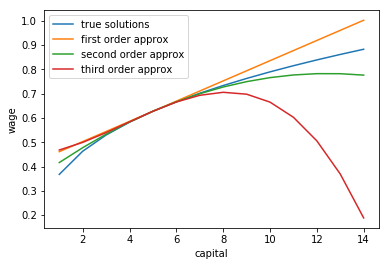

In [35]:
plt.plot(k_grid, wage_grid, label="true solutions")
plt.plot(k_grid, w1grid, label="first order approx")
plt.plot(k_grid, w2grid, label="second order approx")
plt.plot(k_grid, w3grid, label="third order approx")

plt.xlabel("capital")
plt.ylabel("wage")
plt.legend()
plt.show()
plt.close()

[0.78930333]
[-30.93112716] [0.80844627] [158.21408655] [3.55271368e-09] [-3.10381365] [-1009.02352784] [1.58487163e-05] [-8.8817842e-13] [1.77635684e-06]
[0.02613698] [-0.00175118] [-0.00075759]


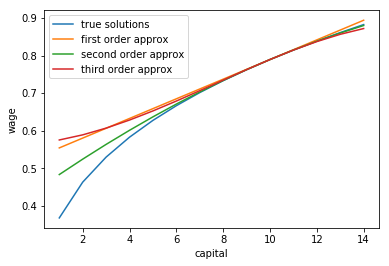

In [36]:
#Do the same centered around k = 10
##get derivatives from numerical differentiator
k = 10
k0 = 10
w0 = fsolve(f, .5)
print(w0)
fx, fy, fxx, fyy, fxy, fxxx, fxxy, fxyy, fyyy = third_order(excess, w0, 10, .001)
print(fx, fy, fxx, fyy, fxy, fxxx, fxxy, fxyy, fyyy)

##Calculate our cubic approximation using the formulas
w1 = - fy/fx
w2 = -(fxx*w1**2 + 2*fxy*w1 + fyy)/fx
w3 = -(fxxx*w1**3 + 3*(fxx*w1*w2 + fxy*w2 + fxxy*w1**2 + fxyy*w1) + fyyy)/fx

print(w1, w2, w3)

k_grid = np.arange(1,15,1)
wage_grid = np.zeros(len(k_grid))
w1grid = np.zeros(len(k_grid))
w2grid = np.zeros(len(k_grid))
w3grid = np.zeros(len(k_grid))
for i in range(len(k_grid)):
    k = k_grid[i]
    wage_grid[i] = fsolve(f, .5)
    w1grid[i] = w0 + w1*(k_grid[i]- k0)
    w2grid[i] = w1grid[i] + .5*w2*(k_grid[i] - k0)**2
    w3grid[i] = w2grid[i] + (1/6)*w3*(k_grid[i]-k0)**3
    
#Create the same plot
plt.plot(k_grid, wage_grid, label="true solutions")
plt.plot(k_grid, w1grid, label="first order approx")
plt.plot(k_grid, w2grid, label="second order approx")
plt.plot(k_grid, w3grid, label="third order approx")

plt.xlabel("capital")
plt.ylabel("wage")
plt.legend()

# Exercise 3:

In [37]:
def Func(x, y):
    return (x**(.35) + .9*x - y)**(-2.5) - .95*(y**.35 + .9*y)**(-2.5)

In [38]:
fx, fy, fxx, fyy, fxy, fxxx, fxxy, fxyy, fyyy = third_order(Func, 100.,47.4658, .001)

##Calculate our cubic approximation using the formulas
w1 = - fx/fy
w2 = -(fyy*w1**2 + 2*fxy*w1 + fxx)/fy
w3 = -(fyyy*w1**3 + 3*(fyy*w1*w2 + fxy*w2 + fxyy*w1**2 + fxxy*w1) + fxxx)/fy
print(w1, w2, w3)

0.4710856623558523 -1.3175338390948873e-05 0.0020747555648762523


We see that our polynomial approximation becomes:

$$y = G(x) \approx 47.4658 + .4711(x - 100) - \frac{1.3175*10^{-5}(x - 100)^2}{2} - \frac{.0021(x-100)^3}{6}$$

In [40]:
grid = np.linspace(99, 101, 100)
x0 = 100
x= 100
g = lambda y: Func(x, y)
y0 = fsolve(g, 20)
print(y0)

true_grid = np.zeros(len(grid))
grid1 = np.zeros(len(grid))
grid2 = np.zeros(len(grid))
grid3 = np.zeros(len(grid))
for i in range(len(grid)):
    x = grid[i]
    true_grid[i] = fsolve(g, 50)
    grid1[i] = y0 + w1*(grid[i]- x0)
    grid2[i] = grid1[i] + .5*w2*(grid[i] - x0)**2
    grid3[i] = grid2[i] + (1/6)*w3*(grid[i]-x0)**3

[47.46578754]


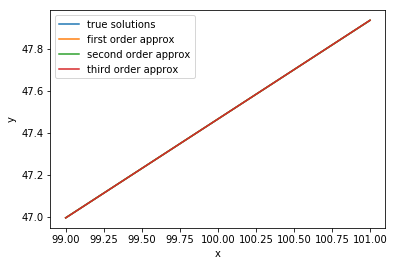

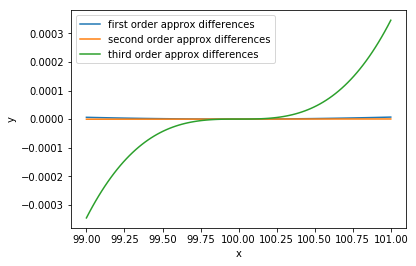

In [41]:
#Create the same plot
plt.plot(grid, true_grid, label="true solutions")
plt.plot(grid, grid1, label="first order approx")
plt.plot(grid, grid2,label="second order approx")
plt.plot(grid, grid3,label="third order approx")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

#plot differences 

plt.plot(grid, grid1 - true_grid, label="first order approx differences")
plt.plot(grid, grid2 - true_grid,label="second order approx differences")
plt.plot(grid, grid3 - true_grid,label="third order approx differences")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
plt.close()

# Exercise 4:

0.4000000000000008
-1.143056760731871


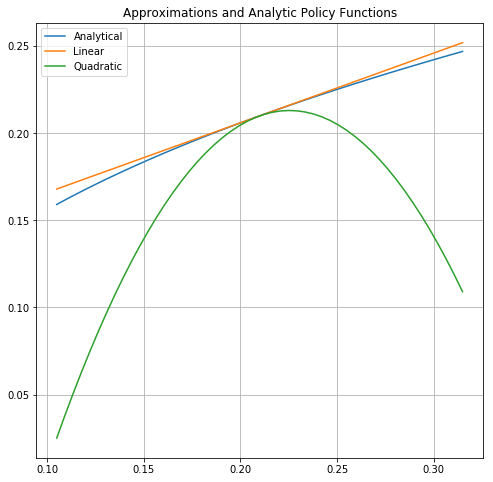

In [42]:
import sympy as sy
from sympy.solvers import solve
##To compute analytical derivatives, we'll just use sympy

kbar = (alpha * beta) ** (1 / (1 - alpha))


# Symbols:
u = sy.Symbol('u') # K_t
x = sy.Function('x')(u) # x is a function of u, K_{t+1}
y = sy.Function('y')(u) # y is a functino of u, K_{t+2}
xu = sy.Symbol('xu') 
xuu = sy.Symbol('xuu')

# Euler Equation
F = (1 / (u ** alpha - x)) - ((beta * alpha * x ** (alpha - 1)) / (x ** alpha - y))

dFu = sy.diff(F, u)

dFuSubs = dFu.subs([(sy.diff(x, u), xu), (sy.diff(y, u), xu ** 2), (y, kbar), (x, kbar), (u, kbar)])

# Solve for x_u and x_uu
xu = float(solve(dFuSubs)[0])

dFuu = sy.diff(F, u, 2)
# Subsitute in xu and xuu for derivatives of x and y and evaluate at steady state
dFuuSubs = dFuu.subs([(sy.diff(y, u, 2), (xu + xu ** 2) * xuu), (sy.diff(x, u, 2), xuu), 
                      (sy.diff(y, u), xu ** 2), (sy.diff(x, u), xu), 
                      (y, kbar), (x, kbar), (u, kbar)])

xuu = float(solve(dFuuSubs)[0])

print(xu)
print(xuu)
#Policy functions:
def analytic(alpha, beta, k):
    return alpha * beta * (k ** alpha)

def linear(k, kbar, xu):
    return kbar + kbar * xu * ((k - kbar) / kbar) 

def quadratic(k, kbar, xu, xuu):
    return kbar + kbar * xu * ((k - kbar) / kbar) + 0.5 * xuu * ((k - kbar) / kbar) ** 2 

# Create Capital Grid
kGrid = np.linspace(0.5 * kbar, 1.5 * kbar, 50)

# Plot policy functions
fig = plt.figure(figsize=(8, 8))
plt.plot(kGrid, analytic(alpha, beta, kGrid), label='Analytical')
plt.plot(kGrid, linear(kGrid, kbar, xu), label='Linear')
plt.plot(kGrid, quadratic(kGrid, kbar, xu, xuu), label='Quadratic')
plt.grid()
plt.title('Approximations and Analytic Policy Functions')
plt.legend()
plt.show()